In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
%matplotlib inline  

In [40]:
df_votes = pd.read_csv('data/votes_all.csv')[:10000]
df_votes.tail()
# pd.get_dummies(s)

,Unnamed: 0,action_date,action_time,chamber,congress,legis_num,majority,name,party,role,rollcall_num,session,state,vote,vote_desc,vote_question,vote_result,vote_type
9995,9995,27-Jan-2014,6:55 PM,U.S. House of Representatives,113,H R 2166,R,Clark (MA),D,legislator,24,2nd,MA,Yea,Good Samaritan Search and Recovery Act,"On Motion to Suspend the Rules and Pass, as Am...",Passed,2/3 YEA-AND-NAY
9996,9996,27-Jan-2014,6:55 PM,U.S. House of Representatives,113,H R 2166,R,Clarke (NY),D,legislator,24,2nd,NY,Yea,Good Samaritan Search and Recovery Act,"On Motion to Suspend the Rules and Pass, as Am...",Passed,2/3 YEA-AND-NAY
9997,9997,27-Jan-2014,6:55 PM,U.S. House of Representatives,113,H R 2166,R,Clay,D,legislator,24,2nd,MO,Yea,Good Samaritan Search and Recovery Act,"On Motion to Suspend the Rules and Pass, as Am...",Passed,2/3 YEA-AND-NAY
9998,9998,27-Jan-2014,6:55 PM,U.S. House of Representatives,113,H R 2166,R,Cleaver,D,legislator,24,2nd,MO,Yea,Good Samaritan Search and Recovery Act,"On Motion to Suspend the Rules and Pass, as Am...",Passed,2/3 YEA-AND-NAY
9999,9999,27-Jan-2014,6:55 PM,U.S. House of Representatives,113,H R 2166,R,Clyburn,D,legislator,24,2nd,SC,Yea,Good Samaritan Search and Recovery Act,"On Motion to Suspend the Rules and Pass, as Am...",Passed,2/3 YEA-AND-NAY


In [70]:
df = df_votes[['legis_num', 'name', 'vote']].groupby( [ 'legis_num', 'name'], as_index=False)
# print('len legis unique', len(df['legis_num'].unique()))
# print('len name unique', len(df['name'].unique()))
df.tail()



,legis_num,name,vote
0,QUORUM,Aderholt,Present
1,QUORUM,Amash,Present
2,QUORUM,Amodei,Not Voting
3,QUORUM,Andrews,Not Voting
4,QUORUM,Bachmann,Present
5,QUORUM,Bachus,Not Voting
6,QUORUM,Barber,Not Voting
7,QUORUM,Barletta,Present
8,QUORUM,Barr,Present
9,QUORUM,Barrow (GA),Present


In [80]:
print(df_votes['vote'].unique())
target = {'Present':0, 'Not Voting':1, 'Yea':2, 'Nay':3, 'Aye':4, 'No':5}

for legis_num in df_votes['legis_num'].unique():
    votes = df_votes[df_votes['legis_num'] == legis_num]
    print(votes[['legis_num', 'name', 'vote']])
    for name in df_votes['name'].unique():
        
    break

['Present' 'Not Voting' 'Yea' 'Nay' 'Aye' 'No']
    legis_num               name        vote
0      QUORUM           Aderholt     Present
1      QUORUM              Amash     Present
2      QUORUM             Amodei  Not Voting
3      QUORUM            Andrews  Not Voting
4      QUORUM           Bachmann     Present
5      QUORUM             Bachus  Not Voting
6      QUORUM             Barber  Not Voting
7      QUORUM           Barletta     Present
8      QUORUM               Barr     Present
9      QUORUM        Barrow (GA)     Present
10     QUORUM             Barton     Present
11     QUORUM               Bass     Present
12     QUORUM             Beatty     Present
13     QUORUM            Becerra     Present
14     QUORUM           Benishek  Not Voting
15     QUORUM         Bentivolio     Present
16     QUORUM          Bera (CA)     Present
17     QUORUM          Bilirakis     Present
18     QUORUM        Bishop (GA)     Present
19     QUORUM        Bishop (NY)     Present
20     

data.shape (150, 3)
[0.16057304 0.05292593 0.18462874]


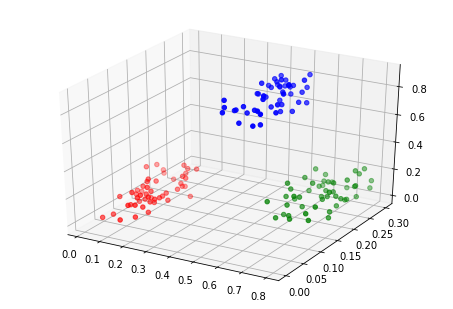

In [81]:
c1 = np.random.rand(50, 3)/5
c2 = (0.6, 0.1, 0.05) + np.random.rand(50, 3)/5
c3 = (0.4, 0.1, 0.7) + np.random.rand(50, 3)/5
data = np.float32(np.concatenate((c1, c2, c3)))
print('data.shape', data.shape)
print(data[0])
colors = ["red"] * 50
colors.extend(["green"] * 50)
colors.extend(["blue"] * 50)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors)
labels = range(150)

In [26]:
n_rows, n_columns = 100, 160
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som.train(data)

CPU times: user 11.2 s, sys: 16 ms, total: 11.2 s
Wall time: 1.62 s


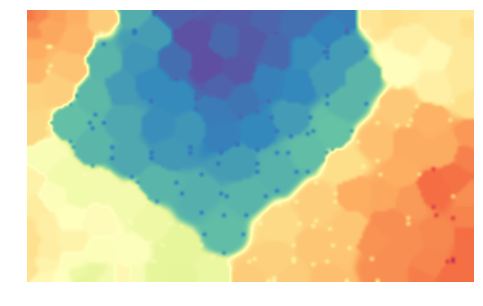

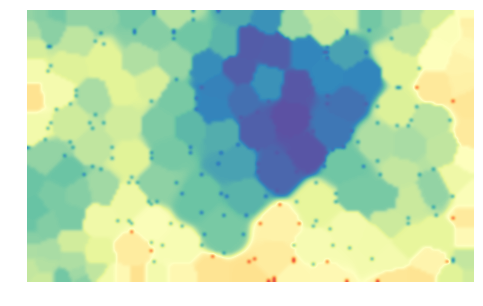

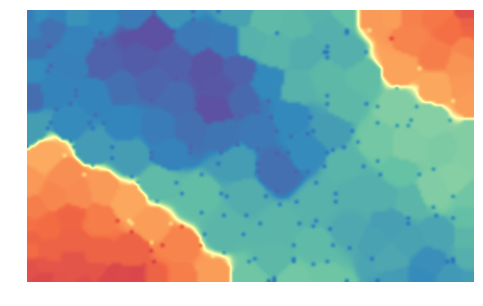

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

In [27]:
som.view_component_planes()

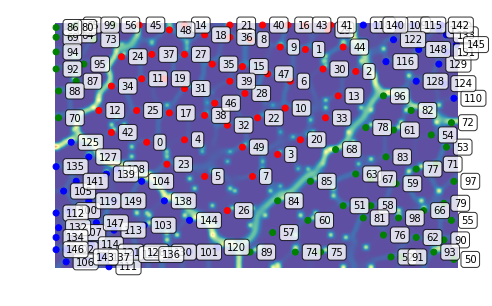

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

In [28]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)

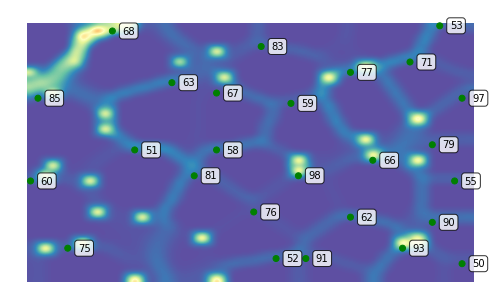

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

In [29]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels, 
                 zoom=((50, n_rows), (100, n_columns)))

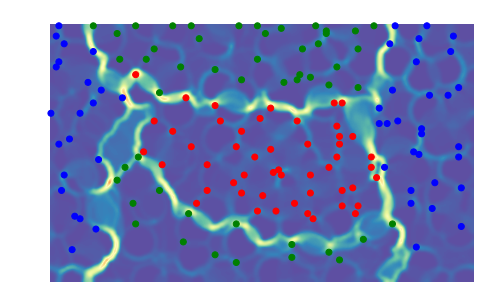

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

In [30]:
som = somoclu.Somoclu(n_columns, n_rows, maptype="toroid")
som.train(data)
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

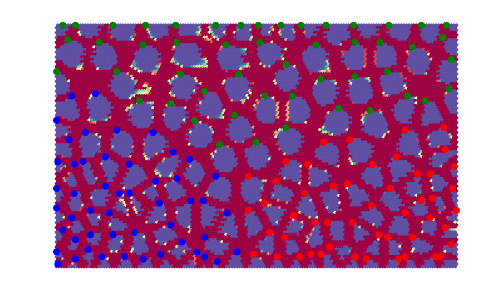

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

In [31]:
som = somoclu.Somoclu(n_columns, n_rows, gridtype="hexagonal", compactsupport=False)
som.train(data)
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

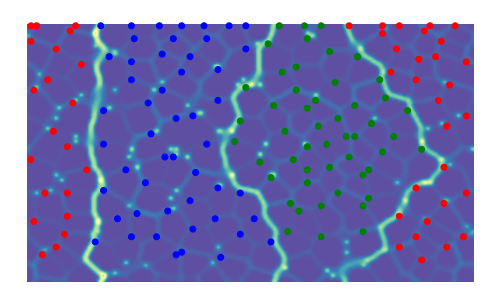

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

In [32]:
som = somoclu.Somoclu(n_columns, n_rows, maptype="toroid",
                      compactsupport=False, initialization="pca")
som.train(data)
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

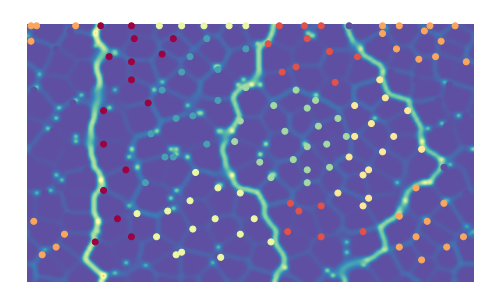

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

In [33]:
som.cluster()
som.view_umatrix(bestmatches=True)

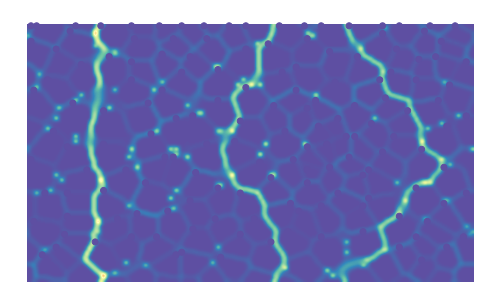

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

In [34]:
from sklearn.cluster import DBSCAN
algorithm = DBSCAN()
som.cluster(algorithm=algorithm)
som.view_umatrix(bestmatches=True)

# Evolving maps

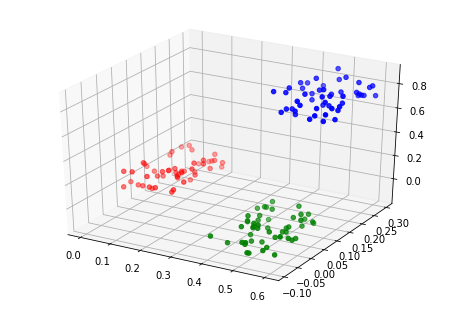

In [35]:
som = somoclu.Somoclu(n_columns, n_rows, maptype="toroid")
som.train(data)

c2_shifted = c2 - 0.2
updated_data = np.float32(np.concatenate((c1, c2_shifted, c3)))
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(updated_data[:, 0], updated_data[:, 1], updated_data[:, 2], c=colors)

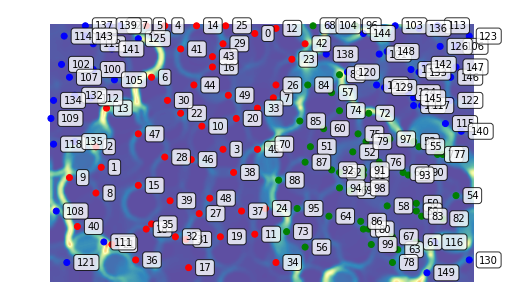

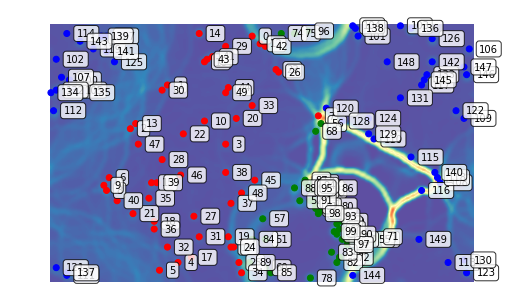

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

In [36]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)
som.update_data(updated_data)
som.train(epochs=2, radius0=20, scale0=0.02)
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)